In [1]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

### Generate a pattern 1d

In [2]:
def create_patterns_1d(N_spins,mu):
    #N_spins = 200 # number of spins
    #mu = 5 # number of patterns
    patterns = np.array([np.random.randint(0,2,N_spins) * 2 -1 for i in range(mu)])
    return patterns

### Compute the energy of the configuration

##### weights matrix


In [3]:
def compute_weights_1d(patterns):
    N_spins = patterns.shape[1]
    weight_matrix = (1/N_spins) * np.outer(patterns[0],patterns[0])
    for i in range(1,patterns.shape[0]):
        weight_matrix += (1/N_spins) * np.outer(patterns[i],patterns[i])
    np.fill_diagonal(weight_matrix, 0)
    return weight_matrix

##### Energy computation (for each stored pattern)

In [4]:
def compute_energy_1d(pattern, weights):
    E = -0.5 * np.dot(pattern, np.dot(weights, pattern))
    return E

##### Corrupt a pattern

In [5]:
def pattern_corruption_1d(pattern,q):
    corrupted = pattern.copy()
    flip_numbers = int(len(pattern) * q)
    flip_indexes = np.random.choice(len(pattern), flip_numbers, replace = False)
    corrupted[flip_indexes] *= -1
    return corrupted

##### Metropolis minimization of energy

In [6]:
def metropolis_1d(corrupted, weights, T, steps):
    beta = 1/T
    pattern_copy = corrupted.copy()
    
    for _ in range(steps):
        i = np.random.randint(0,len(corrupted))
        hi = np.sum(weights[i] * pattern_copy)
        Delta_E = 2 * pattern_copy[i] * hi
        x = np.random.random()
        
        #Metropolis condition:
        if Delta_E < 0 or x < np.exp(-beta * Delta_E):
            pattern_copy[i] *= -1
    return pattern_copy

##### Check pattern correctness

In [7]:
def check_correctness(original, retrieved):
    return np.mean(original == retrieved)  # Fraction of correct spins

In [8]:
def mattis_overlap_1d(pattern, retrieved):
    return (1/len(pattern)) * np.dot(pattern.reshape(-1),retrieved.reshape(-1))

In [9]:
def select_pattern_1d(patterns):
    return np.random.randint(0,len(patterns))

##### Example of application

In [10]:
#Create the patterns:
patterns = create_patterns_1d(1000,100) # 5 1-d patterns of 200 spins each one
J = compute_weights_1d(patterns) # compute the weights matrix

# Apply MC evolution for pattern 0 for example
q = 0.1 # fraction of corrupted spins in a pattern
corrupted = pattern_corruption_1d(patterns[0],q) # corrupt pattern 0

#let'see the results:
print("corrupted pattern: \n")
print(corrupted)
print("\nEnergy after the corruption: ", compute_energy_1d(corrupted, J)) #check total energy of the configuration
print("\n Retrieved pattern: ")

T = 0.001 # thermal noise
steps = 1000 # number of iterations
retrieved_pattern = metropolis_1d(corrupted,J,T,steps) #apply metropolis algorithm to retrieve the original stored pattern
print("\n",retrieved_pattern)
print("\nEnergy of the retrieved pattern: ", compute_energy_1d(retrieved_pattern, J))

# check accuracy of the retrieval process
print("accuracy: ", check_correctness(patterns[0],retrieved_pattern))
for pattern in patterns:
    print("overlap = ", mattis_overlap_1d(pattern,retrieved_pattern))

corrupted pattern: 

[ 1  1 -1 -1  1 -1 -1  1  1 -1  1  1  1  1 -1 -1 -1  1 -1 -1  1 -1  1 -1
  1  1 -1 -1  1 -1 -1 -1 -1  1  1  1  1 -1  1  1  1 -1  1  1 -1 -1 -1 -1
  1  1 -1 -1 -1 -1  1  1  1  1 -1 -1 -1  1  1 -1  1  1 -1  1 -1  1 -1  1
 -1  1  1  1  1  1  1 -1  1 -1  1  1 -1  1 -1  1 -1 -1  1 -1  1 -1  1 -1
 -1 -1  1  1 -1  1  1  1  1 -1 -1  1  1  1  1  1 -1  1  1 -1 -1  1  1  1
  1 -1  1 -1  1 -1  1 -1 -1  1  1  1  1  1  1  1 -1  1  1  1  1  1 -1  1
  1 -1  1 -1 -1 -1 -1  1 -1  1  1 -1 -1 -1 -1 -1 -1  1  1  1 -1 -1  1 -1
  1  1 -1  1  1 -1 -1  1  1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  1 -1 -1 -1 -1  1 -1  1 -1 -1  1  1 -1  1  1 -1 -1  1 -1  1  1  1  1  1
 -1 -1 -1  1 -1 -1  1  1 -1  1 -1  1  1 -1 -1 -1 -1 -1  1  1  1  1 -1  1
 -1  1 -1 -1  1  1  1  1  1 -1 -1 -1  1  1 -1  1  1  1 -1  1  1  1  1  1
  1 -1 -1 -1  1 -1  1 -1  1 -1 -1 -1  1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1
  1 -1 -1 -1  1  1 -1  1  1  1 -1 -1 -1  1  1 -1  1  1 -1 -1  1 -1  1  1
 -1  1  1 -1  1 -1  1 -1 -1  1

## 2D implementation

We now implement the same functions used for the 1-d case to describe a 2-dimensional pattern

In [11]:
def create_patterns_2d(rows,columns,N_patterns):
    patterns = []
    for _ in range(N_patterns):
        pattern = np.random.randint(0,2,size = (rows,columns)) * 2 -1
        patterns.append(pattern)
    return np.array(patterns)

In [12]:

def compute_weights_2d(patterns):
    N_spins = patterns.shape[1] * patterns.shape[2]
    weight_matrix = (1/N_spins) * np.outer(patterns[0],patterns[0])
    for i in range(1,patterns.shape[0]):
        weight_matrix += (1/N_spins) * np.outer(patterns[i],patterns[i])
    np.fill_diagonal(weight_matrix, 0)
    return weight_matrix


In [13]:
def compute_energy_2d(pattern, weights):
    E = -0.5 * np.dot(pattern.reshape(-1), np.dot(weights, pattern.reshape(-1))) #flattens the matrix in a 1d array
    return E

In [14]:
def pattern_corruption_2d(pattern,q):
    rows = pattern.shape[0]
    columns = pattern.shape[1]
    corrupted = pattern.reshape(-1).copy()
    flip_numbers = int(len(corrupted) * q)
    flip_indexes = np.random.choice(len(corrupted), flip_numbers, replace = False)
    corrupted[flip_indexes] *= -1
    return corrupted.reshape(rows,columns)

In [15]:
def metropolis_2d(corrupted, weights, T, steps):
    beta = 1/T
    rows = corrupted.shape[0]
    columns = corrupted.shape[1]
    pattern_copy = corrupted.reshape(-1).copy()
    
    for _ in range(steps):
        i = np.random.randint(0,rows * columns)
        hi = np.sum(weights[i] * pattern_copy)
        Delta_E = 2 * pattern_copy[i] * hi
        x = np.random.random()
        
        #Metropolis condition:
        if Delta_E < 0 or x < np.exp(-beta * Delta_E):
            pattern_copy[i] *= -1
    return pattern_copy.reshape(rows,columns)

In [16]:
def mattis_overlap_2d(pattern, retrieved):
    N_spins = pattern.shape[0] * pattern.shape[1]
    return (1/N_spins) * np.dot(pattern.reshape(-1),retrieved.reshape(-1))

In [17]:
def select_pattern_2d(patterns):
    return np.random.randint(0,patterns.shape[0])

Let's see if it works:

In [ ]:
rows = 10
columns = 10  
N = 15 #number of patterns

patterns2d = create_patterns_2d(rows,columns,N)
J_2d = compute_weights_2d(patterns2d)

# Apply MC evolution for pattern 0 for example
q = 0.1 # fraction of corrupted spins in a pattern
corrupted = pattern_corruption_2d(patterns2d[0],q) # corrupt pattern 0

print("original pattern: \n")
print(patterns2d[0])
print("\n")
#let'see the results:
print("corrupted pattern: \n")
print(corrupted)
print("\nEnergy after the corruption: ", compute_energy_2d(corrupted, J_2d)) #check total energy of the configuration
print("\n Retrieved pattern: ")

T = 0.001 # thermal noise
steps = 1000# number of iterations
retrieved_pattern = metropolis_2d(corrupted,J_2d,T,steps) #apply metropolis algorithm to retrieve the original stored pattern
print("\n",retrieved_pattern)
print("\nEnergy of the retrieved pattern: ", compute_energy_2d(retrieved_pattern, J_2d))

# check accuracy of the retrieval process
#print("accuracy: ", check_correctness(patterns2d[0],retrieved_pattern))
print("accuracy: ", mattis_overlap_2d(patterns2d[0],retrieved_pattern))

## Stability analysis

With the term "stability" we mean the ability of the algorithm to converge to the correct pattern given as input exactly one of the stored pattern.
We will check it for:
- Different range of **temperatures**
- Different number of **iterations** in the Metropolis algorithm

### Stability for different temperatures

In [ ]:
#create some patterns:
# for reproducibility
np.random.seed(1234)

rows,columns = 10,10
N_patterns = 6
patterns = create_patterns_2d(rows,columns,N_patterns) #created 6 patterns 10 x 10 (i.e. 100 spins)
J = compute_weights_2d(patterns) #compute the weight matrix of the stored patterns
#plt.imshow(patterns[0], origin = 'lower')

steps = 50 #steps for the Metropolis algorithm
#check the stability under different temperatures:
T = np.linspace(0.001,3,60)
accuracy_list = [] #we will check accuracy by the use of Mattis order parameter
for temperature in T:
    accuracy = 0
    for _ in range(150): #we compute the accuracy 5 times for each temperature and then compute the mean
        i = select_pattern_2d(patterns)
        corrupted = pattern_corruption_2d(patterns[i],0) # zero corruption of the pattern
        retrieved = metropolis_2d(corrupted,J,temperature,steps)
        accuracy += mattis_overlap_2d(patterns[i],retrieved)
    accuracy_list.append(accuracy/150)

#Plotting the results
plt.grid()
plt.title("Accuracy vs Temperature")
plt.xlabel("Temperature")
plt.ylabel("Accuracy")
# Add shaded background for different stability phases
#plt.axvspan(0, 1, color="limegreen", alpha=0.1, label="Stable retrieval")
plt.plot(T,np.array(accuracy_list), linestyle="--", markersize=6, 
         color="royalblue", linewidth=2)



We see that there is a stable retrieval phase (accuracy of retrieval > 90%) in a temperature range approximately within the interval (0,1]

### Stability for different iterations

In [ ]:
#check the stability under different temperatures:
steps = np.linspace(1,10000,10, dtype = 'int') #steps for the Metropolis algorithm
fractions = steps/(rows * columns)
T = np.linspace(0.001,1,5) #range of temperatures to check
labels = [0.001, 0.25, 0.5, 0.75, 1]
#we will check accuracy by the use of Mattis order parameter
plt.figure(figsize = (15,8))
for temperature,label in zip(T,labels):
    accuracy_list = []
    for step in steps:
        accuracy = 0
        for _ in range(100): #we compute the accuracy 5 times for each iteration and then compute the mean
            i = select_pattern_2d(patterns)
            corrupted = pattern_corruption_2d(patterns[i],0) # zero corruption of the pattern
            retrieved = metropolis_2d(corrupted,J,temperature,step)
            accuracy += mattis_overlap_2d(patterns[i],retrieved)
        accuracy_list.append(accuracy/100)
    plt.plot(fractions,np.array(accuracy_list), marker = 'o',linestyle="--", markersize=6, 
             linewidth=2, label = f"T = {label}")

#Plotting the results
plt.grid()
plt.title("Accuracy vs Iterations", fontsize = 14)
plt.xlabel("Iterations/N.spins", fontsize = 14)
plt.ylabel("Accuracy", fontsize = 14)
plt.legend(prop={'size': 12}, loc = 'best')
#plt.tight_layout()


        


In [ ]:
#more accurate scan
#check the stability under different temperatures:
steps = np.linspace(1,10000,10, dtype = 'int') #steps for the Metropolis algorithm
fractions = steps/(rows * columns)
T = np.linspace(0.25,0.5,5)
labels = ['0.25', '0.32', '0.38', '0.44', '0.50']
#we will check accuracy by the use of Mattis order parameter
plt.figure(figsize = (15,8))
for temperature,label in zip(T,labels):
    accuracy_list = []
    for fraction in fractions:
        accuracy = 0
        for _ in range(100): #we compute the accuracy 5 times for each iteration and then compute the mean
            i = select_pattern_2d(patterns)
            corrupted = pattern_corruption_2d(patterns[i],0) # zero corruption of the pattern
            retrieved = metropolis_2d(corrupted,J,temperature,step)
            accuracy += mattis_overlap_2d(patterns[i],retrieved)
        accuracy_list.append(accuracy/100)
    plt.plot(fractions,np.array(accuracy_list), linestyle="--", marker = 'o', markersize=6, 
             linewidth=2, label = f"T = {label}")

#Plotting the results
plt.grid()
plt.yticks([0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
plt.title("Accuracy vs Iterations", fontsize = 14)
plt.xlabel("Iterations/N.spins", fontsize = 14)
plt.ylabel("Accuracy", fontsize = 14)
plt.legend(prop={'size': 14}, loc = 'best')
#plt.tight_layout()

So we see that for T < 0.3 (i. e. $\beta$ > 3.3 ) the model is stable for approximately an arbitrary number of iterations of the Metropolis algorithm.
For the further analysis we fix the temperature at T = 0.1 ($\beta$ = 10).

In [ ]:
##Check for overlaps
overlaps = []
T = 2
steps = 50
n_chosen = select_pattern_2d(patterns) #choose a random pattern
retrieved = metropolis_2d(patterns[n_chosen],J,T,steps)
for pattern in patterns:
    overlap = mattis_overlap_2d(retrieved,pattern)
    overlaps.append(overlap)
overlaps = np.array(overlaps)


fig = plt.figure(figsize=(13, 8))

# Upper row: Original and Retrieved pattern
ax1 = plt.subplot2grid((2, 2), (0, 0))  # Top-left
ax2 = plt.subplot2grid((2, 2), (0, 1))  # Top-right

# Bottom row: Overlap plot spanning two columns
ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=2)  # Bottom, full width
print(f"selected pattern number: {n_chosen}, retrieved pattern number: {np.argmax(overlaps)}, with accuracy: {overlaps[n_chosen]}")
#plot overlaps
ax1.imshow(patterns[n_chosen], origin='lower')
ax1.set_title("Original Pattern", fontsize=14)

ax2.imshow(retrieved, origin='lower')
ax2.set_title("Retrieved Pattern", fontsize=14)

# Plot overlaps in the bottom subplot
ax3.bar(range(len(overlaps)), overlaps, color="royalblue")
ax3.set_title("Overlap with Stored Patterns", fontsize=14)
ax3.set_xlabel("Pattern Index", fontsize=14)
ax3.set_ylabel("Overlap Value", fontsize=14)


In [ ]:
runs = 100
correct_retrieve = []
for _ in range(runs):
    overlaps = []
    i = select_pattern_2d(patterns)
    corrupted = pattern_corruption_2d(patterns[i],0) # zero corruption of the pattern
    retrieved = metropolis_2d(corrupted,J,T,steps)
    for pattern in patterns:
        overlap = mattis_overlap_2d(retrieved,pattern)
        overlaps.append(overlap)
    if (np.argmax(overlaps) == i):
        correct_retrieve.append(True)
    else:
        correct_retrieve.append(False)

correct_retrieve = np.array(correct_retrieve)
print(np.mean(correct_retrieve))

If we select a temperature above the range we found previously, the network can retrieve the correct pattern, even if there is a loss in accuracy proportional to the increase of temperature. In this regime there is no signficant overlap between the retrieved pattern and the othe ones stored, as we can see in the "bar plot"

selected pattern number: 33, retrieved pattern number: 14, with accuracy: 0.14


Text(0, 0.5, 'Overlap Value')

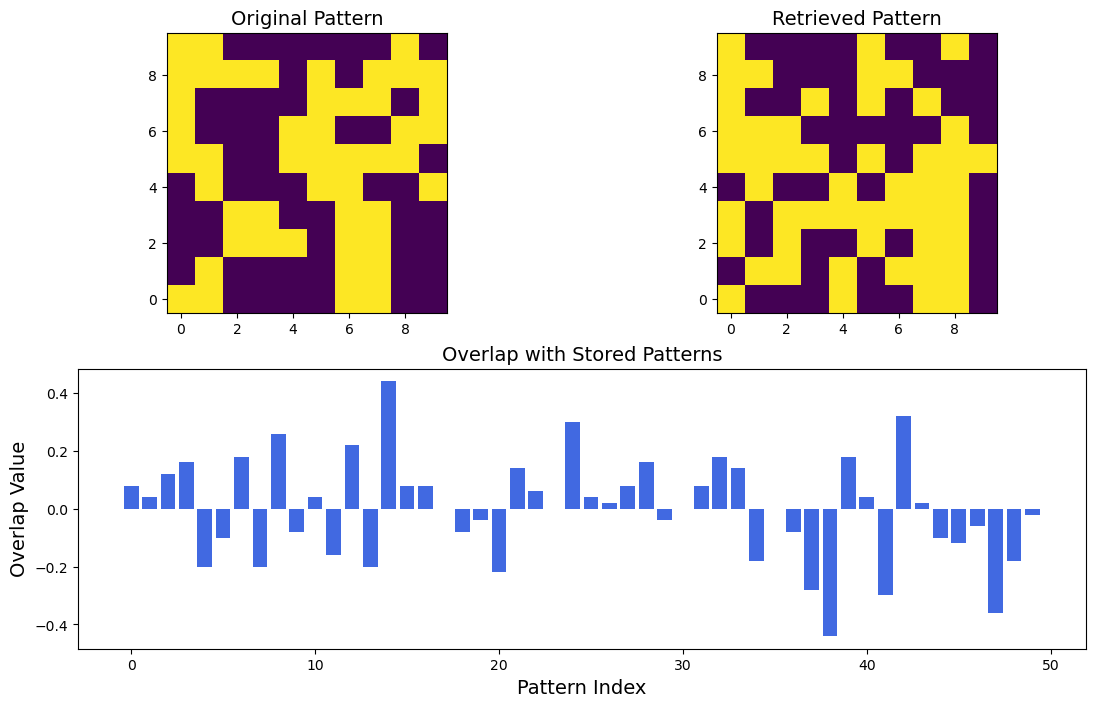

In [42]:
#Check for overlaps
overlaps = []
T = 1.5
steps = 1000
n_chosen = select_pattern_2d(patterns) #choose a random pattern
retrieved = metropolis_2d(patterns[n_chosen],J,T,steps)
for pattern in patterns:
    overlap = mattis_overlap_2d(retrieved,pattern)
    overlaps.append(overlap)
overlaps = np.array(overlaps)


fig = plt.figure(figsize=(13, 8))

# Upper row: Original and Retrieved pattern
ax1 = plt.subplot2grid((2, 2), (0, 0))  # Top-left
ax2 = plt.subplot2grid((2, 2), (0, 1))  # Top-right

# Bottom row: Overlap plot spanning two columns
ax3 = plt.subplot2grid((2, 2), (1, 0),colspan = 2)  # Bottom, full width
#ax4 = plt.subplot2grid((2, 2), (1, 1))
print(f"selected pattern number: {n_chosen}, retrieved pattern number: {np.argmax(overlaps)}, with accuracy: {overlaps[n_chosen]}")
#plot overlaps
ax1.imshow(patterns[n_chosen], origin='lower')
ax1.set_title("Original Pattern", fontsize=14)

ax2.imshow(retrieved, origin='lower')
ax2.set_title("Retrieved Pattern", fontsize=14)

# Plot overlaps in the bottom subplot
ax3.bar(range(len(overlaps)), overlaps, color="royalblue")
ax3.set_title("Overlap with Stored Patterns", fontsize=14)
ax3.set_xlabel("Pattern Index", fontsize=14)
ax3.set_ylabel("Overlap Value", fontsize=14)

#energies = np.array([compute_energy_2d(pattern,J) for pattern in patterns])
#ax4.set_title("Energy spectrum", fontsize = 14)
#ax4.set_xlabel("Pattern label")
#ax4.set_ylabel("Energy")
#ax4.plot(range(len(patterns)),energies)

In [43]:
runs = 100
correct_retrieve = []
for _ in range(runs):
    overlaps = []
    i = select_pattern_2d(patterns)
    corrupted = pattern_corruption_2d(patterns[i],0) # zero corruption of the pattern
    retrieved = metropolis_2d(corrupted,J,T,steps)
    for pattern in patterns:
        overlap = mattis_overlap_2d(retrieved,pattern)
        overlaps.append(overlap)
    if (np.argmax(overlaps) == i):
        correct_retrieve.append(True)
    else:
        correct_retrieve.append(False)

correct_retrieve = np.array(correct_retrieve)
print(np.mean(correct_retrieve))

0.04


If we increase also the number of iterations, the stability of the network fails completely. 
There is some overlap, likely caused by the high number of iterations with respect to the spins in the patterns. 


Now we will check the ability of the network to retrieve a stored pattern from a corrupted pattern

## Analysis of retrieval ability

Now we analyze the ability of the network about retrieving a stored pattern. First, we have to corrupt the chosen pattern by flipping randomly some spins (with probability q). Here is an example of the procedure:

Accuracy of the retrieval: 1.00


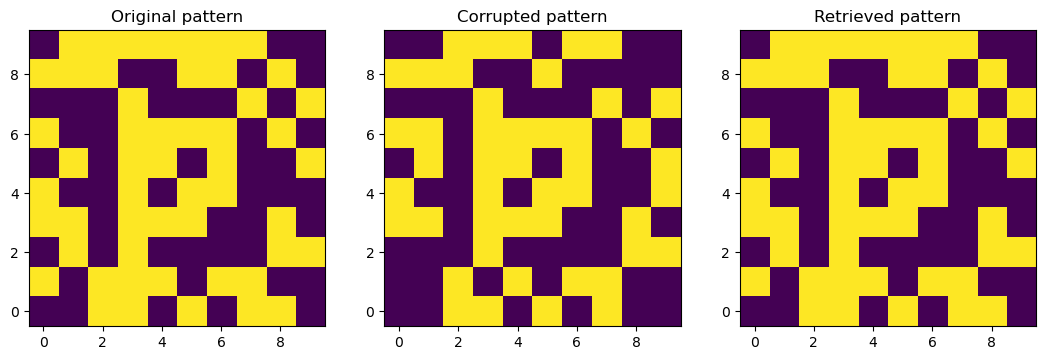

In [44]:
rows,columns = 10,10
N_patterns = 6
patterns = create_patterns_2d(rows,columns,N_patterns) #created 6 patterns 10 x 10 (i.e. 100 spins)
J = compute_weights_2d(patterns) #compute the weight matrix of the stored patterns
#plt.imshow(patterns[0], origin = 'lower')
n_chosen = select_pattern_2d(patterns) #random select one pattern among the ones stored
q = 0.1
corrupted = pattern_corruption_2d(patterns[n_chosen],q) #corrupt it by flipping randomly the 10% of the spins

#we try to retrieve the the stored pattern using Metropolis algorithm:
T = 0.1
steps = 500
retrieved = metropolis_2d(corrupted,J,T,steps)
accuracy = mattis_overlap_2d(patterns[n_chosen],retrieved)

fig, ax = plt.subplots(1,3,figsize=(13,5))
ax[0].imshow(patterns[n_chosen], origin = 'lower')
ax[0].set_title('Original pattern')
ax[1].imshow(corrupted, origin = 'lower')
ax[1].set_title("Corrupted pattern")
ax[2].imshow(retrieved, origin = 'lower')
ax[2].set_title("Retrieved pattern")


print(f"Accuracy of the retrieval: {accuracy:.2f}")

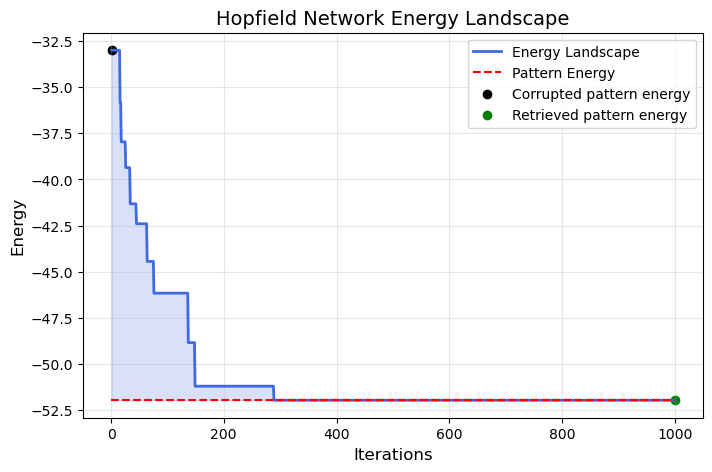

In [45]:
"""
pattern_energy = compute_energy_2d(patterns[n_chosen],J)
corrupted = pattern_corruption_2d(patterns[n_chosen],q) #corrupt it by flipping randomly the 10% of the spins
energy_landscape = []
for _ in range(500): #save energy one iteration at a time
    retrieved = metropolis_2d(corrupted,J,T,1)
    energy_landscape.append(compute_energy_2d(retrieved,J))
    corrupted = retrieved
plt.plot(np.linspace(1,500,500),energy_landscape) 
plt.hlines(y = pattern_energy, xmin=0, xmax=500)
"""
pattern_energy = compute_energy_2d(patterns[n_chosen], J)
corrupted = pattern_corruption_2d(patterns[n_chosen], q)
energy_landscape = []

for _ in range(1000):  # Save energy over iterations
    retrieved = metropolis_2d(corrupted, J, T, 1)
    energy_landscape.append(compute_energy_2d(retrieved, J))
    corrupted = retrieved

iterations = np.linspace(1, 1000, 1000)

# Plot energy landscape
plt.figure(figsize=(8, 5))
plt.plot(iterations, energy_landscape, label="Energy Landscape", color="royalblue", lw=2)
plt.hlines(y=pattern_energy, xmin=0, xmax=1000, colors="red", linestyles="dashed", label="Pattern Energy")

# Adding shaded region for convergence visualization
plt.fill_between(iterations, energy_landscape, pattern_energy, color="royalblue", alpha=0.2)

# Marking initial & final energy values
plt.scatter(1, energy_landscape[0], color='black', marker='o', label="Corrupted pattern energy")
plt.scatter(1000, energy_landscape[-1], color='green', marker='o', label="Retrieved pattern energy")

# Labels and grid
plt.xlabel("Iterations", fontsize=12)
plt.ylabel("Energy", fontsize=12)
plt.title("Hopfield Network Energy Landscape", fontsize=14)
plt.legend()
plt.grid(alpha=0.3)

# Show the plot
plt.show()


Like before, we check how the retrieval ability changes with respect to the number of iterations

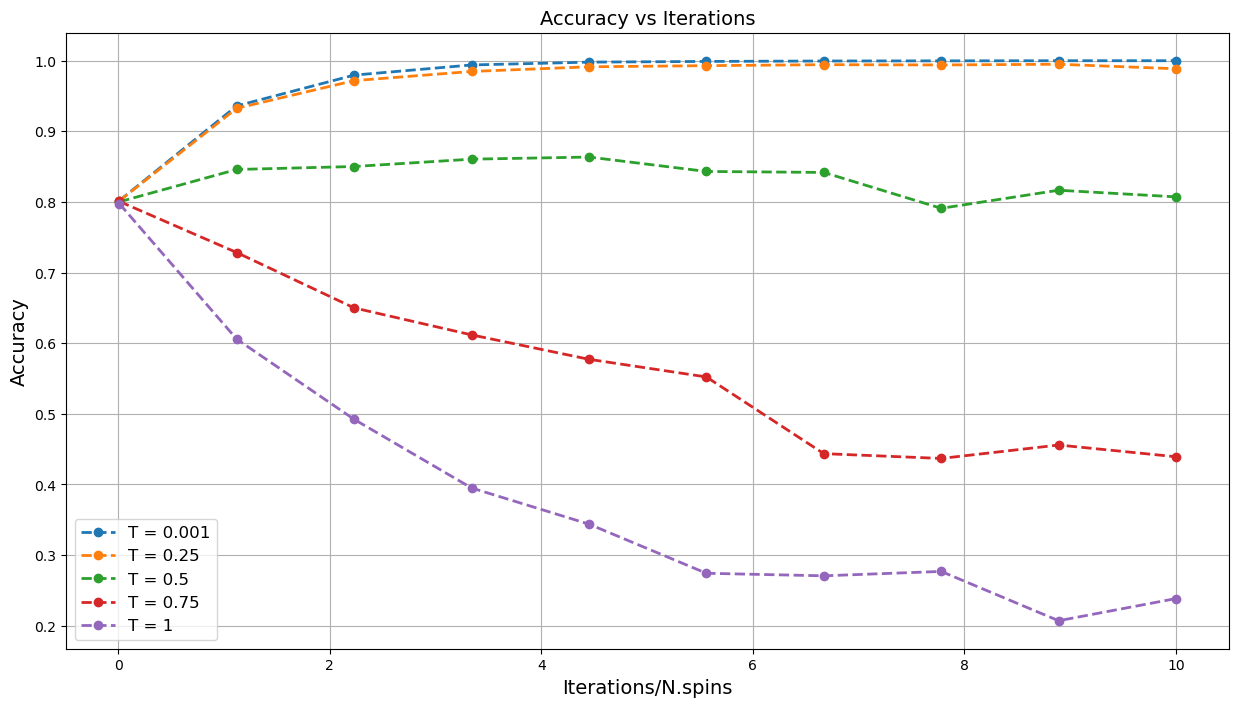

In [46]:
#create some patterns:
#np.random.seed(276) # for reproducibility
rows,columns = 10,10
N_patterns = 6
patterns = create_patterns_2d(rows,columns,N_patterns) #created 6 patterns 10 x 10 (i.e. 100 spins)
J = compute_weights_2d(patterns) #compute the weight matrix of the stored patterns

#check the retrieval ability under different temperatures:
steps = np.linspace(1,1000,10, dtype = 'int') #steps for the Metropolis algorithm
fractions = steps/(rows * columns)
T = np.linspace(0.001,1,5) #range of temperatures to check
labels = [0.001, 0.25, 0.5, 0.75, 1]
q = 0.1 # probability of flipping a spin randomly in the pattern 
#we will check accuracy by the use of Mattis order parameter
plt.figure(figsize = (15,8))
for temperature,label in zip(T,labels):
    accuracy_list = []
    for step in steps:
        accuracy = 0
        for _ in range(100): #we compute the accuracy 5 times for each iteration and then compute the mean
            i = select_pattern_2d(patterns)
            corrupted = pattern_corruption_2d(patterns[i],q) # zero corruption of the pattern
            retrieved = metropolis_2d(corrupted,J,temperature,step)
            accuracy += mattis_overlap_2d(patterns[i],retrieved)
        accuracy_list.append(accuracy/100)
    plt.plot(fractions,np.array(accuracy_list), marker = 'o',linestyle="--", markersize=6, 
             linewidth=2, label = f"T = {label}")

#Plotting the results
plt.grid()
plt.title("Accuracy vs Iterations", fontsize = 14)
plt.xlabel("Iterations/N.spins", fontsize = 14)
plt.ylabel("Accuracy", fontsize = 14)
plt.legend(prop={'size': 12}, loc = 'best')
#plt.tight_layout()


        


We can check the network accuracy for different values of q:

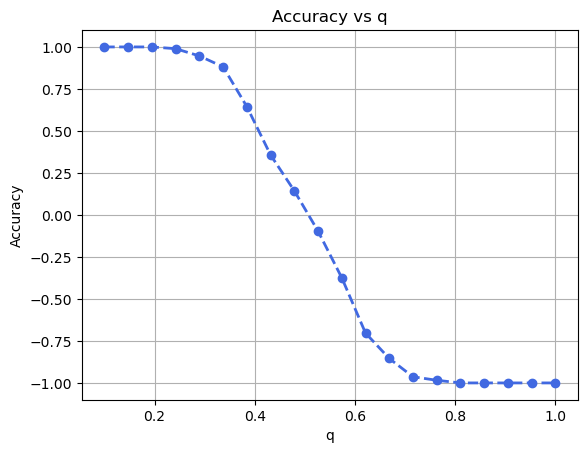

In [47]:
q_values = np.linspace(0.1,1,20)
steps = 1000 #steps for the Metropolis algorithm
T = 0.1
#check the stability under different temperatures:
accuracy_list = [] #we will check accuracy by the use of Mattis order parameter
for q in q_values:
    accuracy = 0
    for _ in range(150): #we compute the accuracy 150 times for each value of q and then compute the mean
        i = select_pattern_2d(patterns)
        corrupted = pattern_corruption_2d(patterns[i],q) # corrupt a spin with probability q
        retrieved = metropolis_2d(corrupted,J,T,steps)
        accuracy += mattis_overlap_2d(patterns[i],retrieved)
    accuracy_list.append(accuracy/150)

#Plotting the results
plt.grid()
plt.title("Accuracy vs q")
plt.xlabel("q")
plt.ylabel("Accuracy")
# Add shaded background for different stability phases
#plt.axvspan(0, 1, color="limegreen", alpha=0.1, label="Stable retrieval")
plt.plot(q_values,np.array(accuracy_list), linestyle="--", marker = 'o',markersize=6, 
         color="royalblue", linewidth=2)
 

From the plot we can recognize different features:

    -1) If the random flip probability is low (approximately less than 0.3) the network can retrieve the stored pattern with sufficent accuracy (more than 80%).
    -2) If q is close to 0.5, the accuracy il close to zero: this means that the network can't recall the original pattern 
    and outputs a random sequence of spins.
    -3) increasing q, the network tends to retrieve original pattern but with all the spins flipped.

In [48]:
#### random patterns 28 x 28

In [49]:
"""
#create some patterns:
np.random.seed(276) # for reproducibility
rows,columns = 28,28
N_patterns = 10
patterns = create_patterns_2d(rows,columns,N_patterns) #created 6 patterns 10 x 10 (i.e. 100 spins)
J = compute_weights_2d(patterns) #compute the weight matrix of the stored patterns
#plt.imshow(patterns[0], origin = 'lower')

steps = 10000 #steps for the Metropolis algorithm
T = 0.1
#check the stability under different temperatures:
accuracy_list = [] #we will check accuracy by the use of Mattis order parameter
for q in q_values:
    accuracy = 0
    for _ in range(10): #we compute the accuracy 150 times for each value of q and then compute the mean
        i = select_pattern_2d(patterns)
        corrupted = pattern_corruption_2d(patterns[i],q) # corrupt a spin with probability q
        retrieved = metropolis_2d(corrupted,J,T,steps)
        accuracy += mattis_overlap_2d(patterns[i],retrieved)
    accuracy_list.append(accuracy/10)

#Plotting the results
plt.grid()
plt.title("Accuracy vs q")
plt.xlabel("q")
plt.ylabel("Accuracy")
# Add shaded background for different stability phases
#plt.axvspan(0, 1, color="limegreen", alpha=0.1, label="Stable retrieval")
plt.plot(q_values,np.array(accuracy_list), linestyle="--", marker = 'o',markersize=6, 
         color="royalblue", linewidth=2)
"""

'\n#create some patterns:\nnp.random.seed(276) # for reproducibility\nrows,columns = 28,28\nN_patterns = 10\npatterns = create_patterns_2d(rows,columns,N_patterns) #created 6 patterns 10 x 10 (i.e. 100 spins)\nJ = compute_weights_2d(patterns) #compute the weight matrix of the stored patterns\n#plt.imshow(patterns[0], origin = \'lower\')\n\nsteps = 10000 #steps for the Metropolis algorithm\nT = 0.1\n#check the stability under different temperatures:\naccuracy_list = [] #we will check accuracy by the use of Mattis order parameter\nfor q in q_values:\n    accuracy = 0\n    for _ in range(10): #we compute the accuracy 150 times for each value of q and then compute the mean\n        i = select_pattern_2d(patterns)\n        corrupted = pattern_corruption_2d(patterns[i],q) # corrupt a spin with probability q\n        retrieved = metropolis_2d(corrupted,J,T,steps)\n        accuracy += mattis_overlap_2d(patterns[i],retrieved)\n    accuracy_list.append(accuracy/10)\n\n#Plotting the results\nplt.

## How accuracy in the retrieval scales with the increase of the stored patterns

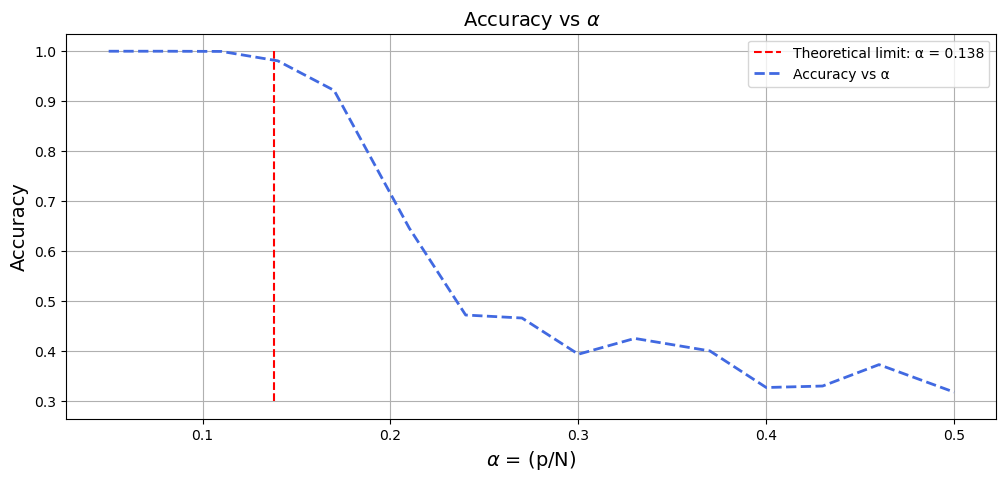

In [50]:
P = np.linspace(5, 50, 15, dtype=int)  # Array of pattern counts
rows, columns = 10, 10  # Number of spins in a pattern
T = 0.1
steps = 1000
accuracy_list = []
alphas = []
patterns = []  # This will store patterns incrementally

for p in P:
    np.random.seed(1234)  # Reset seed so old patterns are regenerated exactly

    patterns = create_patterns_2d(rows, columns, p)  # Always generates the same first `p` patterns
    J = compute_weights_2d(patterns)  
    accuracy = 0

    for _ in range(100):  # Compute accuracy 100 times and take the mean
        i = select_pattern_2d(patterns)
        corrupted = pattern_corruption_2d(patterns[i], 0.1)  # Corrupt 10% of spins
        retrieved = metropolis_2d(corrupted, J, T, steps)
        accuracy += mattis_overlap_2d(patterns[i], retrieved)

    accuracy_list.append(accuracy / 100)
    alphas.append(p / (rows * columns))  # Compute α = p/N

# Find threshold accuracy
threshold_accuracy = np.where(np.array(accuracy_list) > 0.90)[0][-1]

# Plot results
plt.figure(figsize=(12, 5))
plt.grid()
plt.vlines(x=0.138, ymin=0.3, ymax=1, linestyle="--", color="red", label="Theoretical limit: α = 0.138")
#plt.axvspan(0, alphas[threshold_accuracy], color="limegreen", alpha=0.1, label="Correct retrieval area (accuracy > 95%)")
plt.title(r"Accuracy vs $\alpha$", fontsize=14)
plt.xlabel(r"$\alpha$ = (p/N)", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.plot(alphas, np.array(accuracy_list), linestyle="--", markersize=6, color="royalblue", linewidth=2, label="Accuracy vs α")
plt.legend(loc="best")
plt.show()


It is in accordance with the theoretical result of alpha $\approx$ 0.138

Now we can check if there is overlap with other patterns in a case where $\alpha$ is larger than the bound we have just found. We select for example $\alpha$ = 0.4

For α = 0.1: selected pattern number: 6
For α = 0.4: selected pattern number: 39


For α = 0.1: retrieved pattern number: 6
For α = 0.4: retrieved pattern number: 17


Text(0, 0.5, 'Overlap')

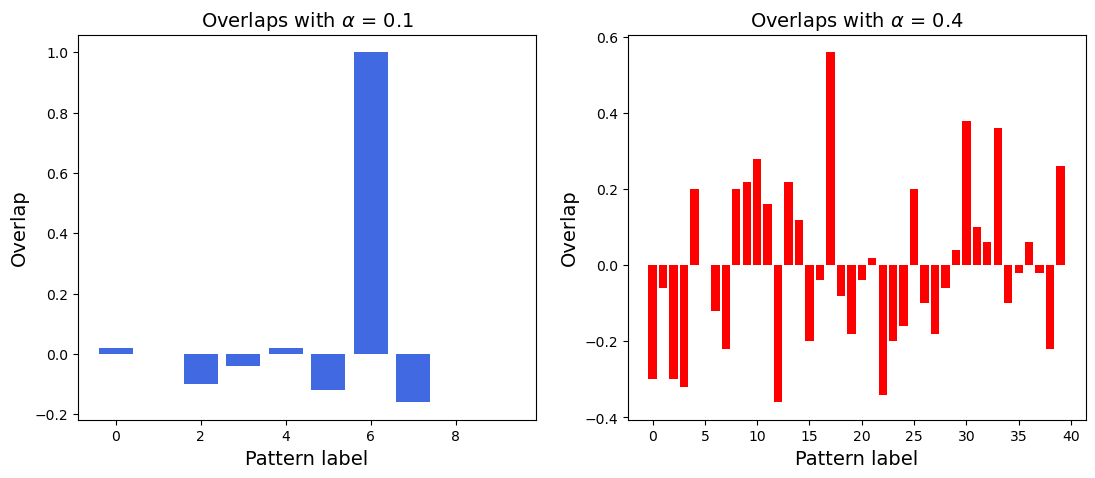

In [51]:
rows, columns = 10, 10
alphas = [0.1,0.4]
overlap_01 = []
overlap_04 = []
T = 0.1
steps = 1000

for alpha in alphas: 
    N_patterns = int(alpha * rows * columns)
    patterns = create_patterns_2d(rows,columns,N_patterns)
    J = compute_weights_2d(patterns)
    n = select_pattern_2d(patterns) #choose a random pattern
    retrieved = metropolis_2d(patterns[n],J,T,steps)
    for pattern in patterns:
        overlap = mattis_overlap_2d(retrieved,pattern)
        if (alpha == 0.1):
            overlap_01.append(overlap)
        else: 
            overlap_04.append(overlap)
    print(fr"For α = {alpha}: selected pattern number: {n}")
print("\n")
print(fr"For α = {alphas[0]}: retrieved pattern number: {np.argmax(overlap_01)}")
print(fr"For α = {alphas[1]}: retrieved pattern number: {np.argmax(overlap_04)}")


#visualization:
fig, ax = plt.subplots(1,2,figsize = (13,5))
ax[0].bar(range(len(overlap_01)), overlap_01, color="royalblue")
ax[0].set_title(r"Overlaps with $\alpha$ = 0.1", fontsize = 14)
ax[0].set_xlabel("Pattern label", fontsize = 14)
ax[0].set_ylabel("Overlap", fontsize = 14)

ax[1].bar(range(len(overlap_04)), overlap_04, color="red")
ax[1].set_title(r"Overlaps with $\alpha$ = 0.4", fontsize = 14)
ax[1].set_xlabel("Pattern label", fontsize = 14)
ax[1].set_ylabel("Overlap", fontsize = 14)

## Time complexity

In [22]:
import time

# Parameters
T = 0.1  # Temperature
N_values = np.arange(10, 80, 10)  # Different spin system sizes
times = []
N_patterns = 10

for N in N_values:
    appending_time = 0
    for _ in range(50):
        patterns = create_patterns_2d(N, N, N_patterns)  # Generate patterns
        weights = compute_weights_2d(patterns)  # Compute weights
        i = select_pattern_2d(patterns)  # Select a pattern
        corrupted = pattern_corruption_2d(patterns[i], q=0.1)  # Corrupt it

        steps = 5 * N * N  # Interactions are always 5 * N**2

        start_time = time.time()
        metropolis_2d(corrupted, weights, T, steps)  # Run Monte Carlo
        appending_time += time.time() - start_time
    times.append(appending_time/50)

plt.grid()
plt.plot(N_values**2, times, linestyle="--", marker = 'o', label='Time Complexity')
plt.xlabel('Number of Spins (N)')
plt.ylabel('Execution Time (s)')
plt.title('Monte Carlo Time Complexity Scaling')
plt.legend()
plt.show()


KeyboardInterrupt: 

In [1]:
import time
T = 0.1  
N_values = np.arange(10, 80, 8)  # Different spin system sizes
N_patterns = 10
times = []
error_times = []
runs = 50
for N in N_values:
    appending_time = []
    for _ in range(runs):
        patterns = create_patterns_2d(N, N, N_patterns)  # Generate patterns
        weights = compute_weights_2d(patterns)  # Compute weights
        i = select_pattern_2d(patterns)  # Select a pattern
        corrupted = pattern_corruption_2d(patterns[i], q=0.1)  # Corrupt it

        steps = 5 * N * N  # Interactions are always 5 * N**2

        start_time = time.time()
        metropolis_2d(corrupted, weights, T, steps)  # Run Monte Carlo
        appending_time.append(time.time() - start_time)
    appending_time = np.array(appending_time)
    times.append(np.mean(appending_time))
    error_times.append(np.std(appending_time))

plt.grid()
plt.errorbar(N_values**2, times, yerr=error_times, linestyle="--", marker = 'o', markersize = 4, capsize = 1, 
             linewidth=2, label='Time Complexity')
plt.xlabel('Number of Spins (N)')
plt.ylabel('Execution Time (s)')
plt.title('Monte Carlo Time Complexity Scaling')
plt.legend()
plt.show() 

NameError: name 'np' is not defined

## Non Mean Field

We propose an approach that computes pairwise interactions exclusively between spins at a distance R from each other. In order to do that we need to change the function that computes the weights matrix.

In [53]:
def compute_weights_nmf(patterns, R):
    N_spins = patterns.shape[1] * patterns.shape[2]
    weight_matrix = np.zeros((N_spins,N_spins))
    for pattern in patterns:
        weight_matrix += np.outer(pattern.reshape(-1),pattern.reshape(-1))
        weight_matrix.reshape((N_spins,N_spins))
        for i in range(patterns.shape[1]):
            for j in range(patterns.shape[2]):
                i_row = 
            
                            
    weight_matrix /= N_spins
    np.fill_diagonal(weight_matrix, 0)
    return weight_matrix
                    
            
patterns_try = create_patterns_2d(10,10,5)
J_try = compute_weights_nmf(patterns_try,2)
print(J_try)   
    
    

SyntaxError: invalid syntax (1034028712.py, line 9)